# Perform logistic regression on Heart disease data
- Find the Co-relation matrix
- Accuracy
- Precision
- Recall/sensitivity
- F1 Score
- False positive Rate
- True Positive rate
- ROC curve


In [ ]:

import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "heart.csv"

# Load the latest version
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "johnsmith88/heart-disease-dataset",
    file_path,
)

print(f"Dataset shape: {df.shape}")
print("First 5 records:")
print(df.head())

/var/folders/hm/mb6vy0f155x78szrrbm9gvch0000gn/T/ipykernel_28314/232702593.py:7: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Dataset shape: (1025, 14)
First 5 records:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    auc
)


# Helper functions

In [ ]:
# Find accuracy, precision, recall, f1-score
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1
# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
# Plot ROC curve
def plot_roc_curve(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Preprocess data
X = df.drop('target', axis=1)
y = df['target']


Accuracy: 0.80
Precision: 0.76
Recall: 0.87
F1-Score: 0.81


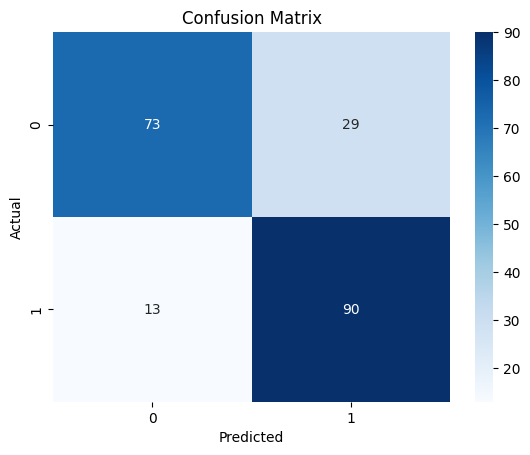

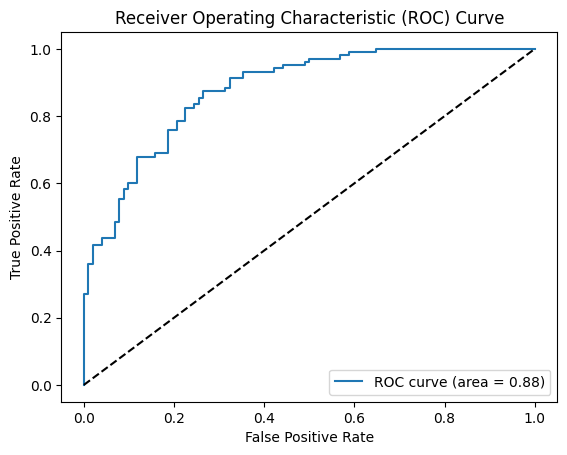

In [13]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Perform XG Boost
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_scores = model.predict_proba(X_test)[:, 1]

# Evaluate model
accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred)
# Plot ROC curve
plot_roc_curve(y_test, y_scores)
